In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

from models import atmosDensity, Cubesat
from maneuvers import Maneuvers
from coordinates import cart2kep
from constants import constants
import helpers

%matplotlib notebook

In [2]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+180e3
ra = constants.Re+1000e3
Omega = 30*np.pi/180
i = 2*np.pi/180#65.1*np.pi/180
omega = 30*np.pi/180
M = 332*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()
#coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = Cubesat()

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.propagate2(60*60*24*1)
maneuvers.addPerturbation("atmosphere")
%time maneuvers.propagate2(60*60*24*109.5)

Propagating...from day  0.0  to  1.0
Day:0.0	Height: 222.9369448495852 km	Mass: 1.0
Day:8.482644925237869e-08	Height: 222.93541173207015 km	Mass: 1.0
Day:8.482644925237869e-08	Height: 222.9354117313586 km	Mass: 1.0
Day:1.6965289850475738e-07	Height: 222.93387863934691 km	Mass: 1.0
Day:1.6965289850475738e-07	Height: 222.93387863863538 km	Mass: 1.0
Day:0.00016796224297497466	Height: 219.95138936145324 km	Mass: 1.0
Day:0.00016796224297497466	Height: 219.9514106870694 km	Mass: 1.0
Day:0.00033575483305144457	Height: 217.06969032499472 km	Mass: 1.0
Day:0.00033575483305144457	Height: 217.06973183850198 km	Mass: 1.0
Day:0.0005035474231279145	Height: 214.2897744081812 km	Mass: 1.0
Day:0.0005035474231279145	Height: 214.28981495279075 km	Mass: 1.0
Day:0.0010357132103575805	Height: 206.1566102621937 km	Mass: 1.0
Day:0.0010357132103575805	Height: 206.1567733340673 km	Mass: 1.0
Day:0.0009451181134171709	Height: 207.4670318705188 km	Mass: 1.0
Day:0.0009451181134171709	Height: 207.46714469834137 km	Ma

Day:88.00038435940206	Height: 353.44958056277875 km	Mass: 1.0
Day:88.00038435940206	Height: 353.4555438557789 km	Mass: 1.0
Day:89.00080680024405	Height: 183.62731487464254 km	Mass: 1.0
Day:89.00080680024405	Height: 183.6283224499235 km	Mass: 1.0
Day:92.0005791652868	Height: 195.57683341158926 km	Mass: 1.0
Day:92.0005791652868	Height: 195.57697079263255 km	Mass: 1.0
Day:93.00083880287981	Height: 241.16355969405453 km	Mass: 1.0
Day:93.00083880287981	Height: 241.310496919089 km	Mass: 1.0
Day:93.000507229824	Height: 246.14079803199508 km	Mass: 1.0
Day:93.000507229824	Height: 246.1437137387935 km	Mass: 1.0
Day:97.00039751741771	Height: 166.3556025578957 km	Mass: 1.0
Day:97.00039751741771	Height: 166.35577030251548 km	Mass: 1.0
Day:98.00038316121777	Height: 206.11137586669903 km	Mass: 1.0
Day:98.00038316121777	Height: 206.1119666003976 km	Mass: 1.0
Day:101.00003609903212	Height: 422.58235471504275 km	Mass: 1.0
Day:101.00003609903212	Height: 422.57967985062675 km	Mass: 1.0
Day:102.00004709618

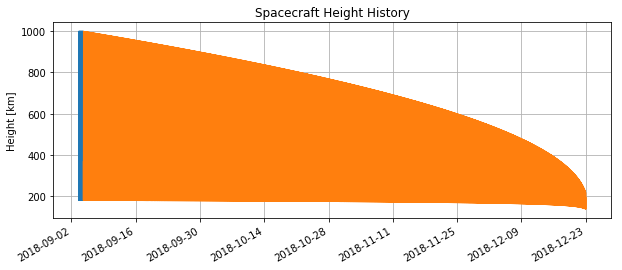

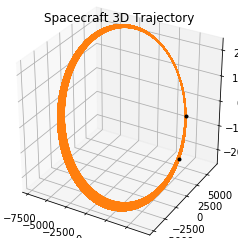

In [21]:
#Plot Height
fig, ax = plt.subplots(figsize=(10,4))
for i in range(0,len(maneuvers.history.maneuverIdxs)-1):
    maneuverSlice = slice(maneuvers.history.maneuverIdxs[i],maneuvers.history.maneuverIdxs[i+1])
    #plt.plot(maneuvers.history.t[maneuvers.history.maneuverIdxs[i]:maneuvers.history.maneuverIdxs[i+1]]/60/60/24,
    #        (np.linalg.norm(maneuvers.history.r[maneuvers.history.maneuverIdxs[i]:maneuvers.history.maneuverIdxs[i+1],:],axis=1)-constants.Re)/1000,linewidth=1)
    ax.plot(maneuvers.history.datetime[maneuverSlice],
            (np.linalg.norm(maneuvers.history.r[maneuverSlice,:],axis=1)-constants.Re)/1000,linewidth=1)

fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_title("Spacecraft Height History")
ax.set_ylabel("Height [km]")
plt.grid()

#Plot 3D Trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
markers = np.zeros([len(maneuvers.history.maneuverIdxs)-1,3])

for i in range(0,len(maneuvers.history.maneuverIdxs)-1):
    maneuverSlice = slice(maneuvers.history.maneuverIdxs[i],maneuvers.history.maneuverIdxs[i+1])
    ax.plot3D(maneuvers.history.r[maneuverSlice,0]/1000,
              maneuvers.history.r[maneuverSlice,1]/1000,
              maneuvers.history.r[maneuverSlice,2]/1000,linewidth=1)
    markers[i,:]= maneuvers.history.r[maneuvers.history.maneuverIdxs[i],:]/1000
ax.plot3D(markers[:,0],markers[:,1],markers[:,2],"k.")
ax.set_aspect("equal")
scale_x = 1.2
scale_y = 1.2
scale_z = 1.2
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1]))
ax.set_title("Spacecraft 3D Trajectory");


##Plot Propellant Usage
#fig2, ax2 = plt.subplots()
#for i in range(0,len(maneuvers.history.maneuverIdxs)-1):
#    maneuverSlice = slice(maneuvers.history.maneuverIdxs[i],maneuvers.history.maneuverIdxs[i+1])
#    ax2.plot(maneuvers.history.datetime[maneuverSlice],maneuvers.history.propMass[maneuverSlice])
#fig2.autofmt_xdate()
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax2.grid()
#ax2.set_title("Propellant Usage")
#ax2.set_ylabel("Propellant Mass Left [Kg]");


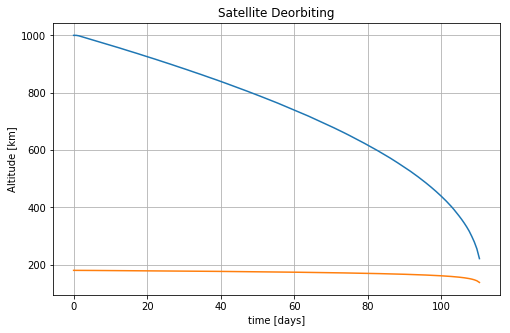

In [7]:
# CALCULATE PERIGEES AND APOGEES
perigees = (1-maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]
apogees = (1+maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]

#PLOTTING
plt.figure(figsize=(8,5))
plt.plot(maneuvers.history.t[:-2:1000]/60/60/24,(apogees[:-2:1000]-constants.Re)/1e3);
plt.plot(maneuvers.history.t[:-2:1000]/60/60/24,(perigees[:-2:1000]-constants.Re)/1e3);
plt.grid();
plt.title("Satellite Deorbiting")
plt.ylabel("Altitude [km]")
plt.xlabel("time [days]")
mplcursors.cursor(hover=True);